In [1]:
import qutip
import matplotlib.pyplot as plt
import numpy as np
from qutip import tensor, num, qeye, create, destroy, basis, sesolve, expect
from collections import Counter

### Using default operators

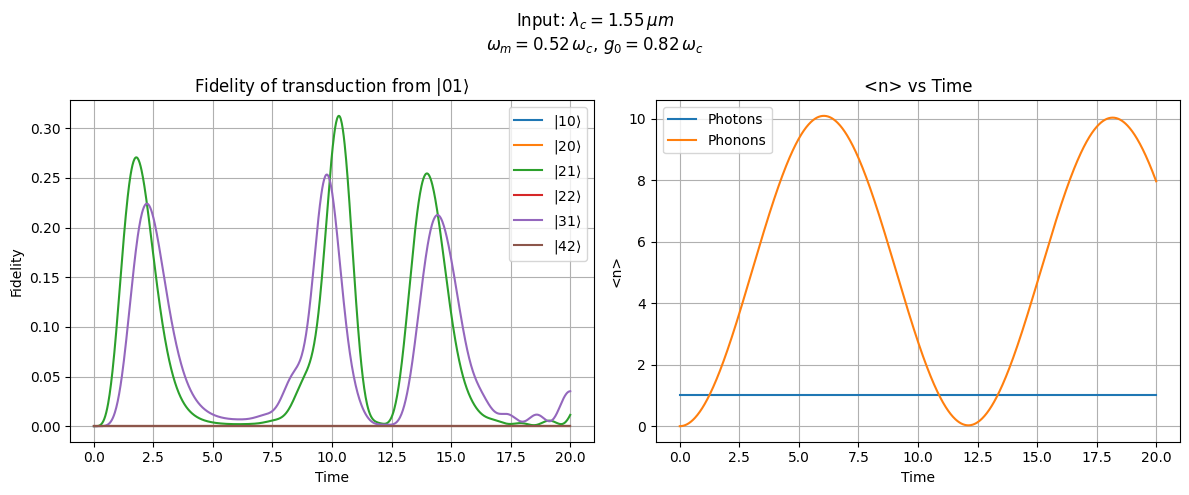

In [51]:
c = 3*10**8
h = 6.626*10**-34
hbar = h/(2*np.pi)

omega_photon = 2*np.pi*c/(1.55*10**-6)
omega_phonon = 2*np.pi*10**14 # f=100 THz
g_0 = 10**15

# omega_photon = 1000
# omega_phonon = 900
# g_0 = 1000

truncation_photon_space = 10
truncation_phonon_space = 20
omega_photon_copy = omega_photon
omega_phonon /= omega_photon
g_0 /= omega_photon
omega_photon = 1

tmax = 20
tlist = np.linspace(0, tmax, 1000)

phonon_term = omega_phonon * tensor(num(truncation_phonon_space), qeye(truncation_photon_space))
photon_term = omega_photon * tensor(qeye(truncation_phonon_space), num(truncation_photon_space))
coupling_term = g_0 * (tensor(create(truncation_phonon_space), num(truncation_photon_space)) + tensor(destroy(truncation_phonon_space), num(truncation_photon_space)))

H = phonon_term + photon_term + coupling_term

initial_state = tensor(basis(truncation_phonon_space, 0), basis(truncation_photon_space, 1))
evolved_states = sesolve(H, initial_state, tlist)

# Target states
target_state10 = tensor(basis(truncation_phonon_space, 1), basis(truncation_photon_space, 0))
target_state20 = tensor(basis(truncation_phonon_space, 2), basis(truncation_photon_space, 0))
target_state21 = tensor(basis(truncation_phonon_space, 2), basis(truncation_photon_space, 1))
target_state22 = tensor(basis(truncation_phonon_space, 2), basis(truncation_photon_space, 2))
target_state31 = tensor(basis(truncation_phonon_space, 3), basis(truncation_photon_space, 1))
target_state42 = tensor(basis(truncation_phonon_space, 4), basis(truncation_photon_space, 2))

fidelity_array_10 = [np.abs(target_state10.overlap(state))**2 for state in evolved_states.states]
fidelity_array_20 = [np.abs(target_state20.overlap(state))**2 for state in evolved_states.states]
fidelity_array_21 = [np.abs(target_state21.overlap(state))**2 for state in evolved_states.states]
fidelity_array_31 = [np.abs(target_state31.overlap(state))**2 for state in evolved_states.states]
fidelity_array_22 = [np.abs(target_state22.overlap(state))**2 for state in evolved_states.states]
fidelity_array_42 = [np.abs(target_state42.overlap(state))**2 for state in evolved_states.states]

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Fidelity vs Time in the first subplot
axes[0].plot(tlist, fidelity_array_10, label=r'$\vert 10 \rangle$')
axes[0].plot(tlist, fidelity_array_20, label=r'$\vert 20 \rangle$')
axes[0].plot(tlist, fidelity_array_21, label=r'$\vert 21 \rangle$')
axes[0].plot(tlist, fidelity_array_22, label=r'$\vert 22 \rangle$')
axes[0].plot(tlist, fidelity_array_31, label=r'$\vert 31 \rangle$')
axes[0].plot(tlist, fidelity_array_42, label=r'$\vert 42 \rangle$')
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Fidelity")
axes[0].set_title(r"Fidelity of transduction from $\vert 01 \rangle$")
axes[0].legend()
axes[0].grid(True)

# Photon and Phonon Expectation vs Time in the second subplot
photon_number_operator = tensor(qeye(truncation_phonon_space), num(truncation_photon_space))
phonon_number_operator = tensor(num(truncation_phonon_space), qeye(truncation_photon_space))

photon_expectation = expect(photon_number_operator, evolved_states.states)
phonon_expectation = expect(phonon_number_operator, evolved_states.states)

axes[1].plot(tlist, photon_expectation, label="Photons")
axes[1].plot(tlist, phonon_expectation, label="Phonons")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("<n>")
axes[1].legend()
axes[1].set_title("<n> vs Time")
axes[1].grid(True)

# Show the plots
fig.suptitle(rf'Input: $\lambda_c = {(2*np.pi*c/omega_photon_copy*10**6):.2f} \, \mu m$' 
             '\n'  # Correct way to break the line
             rf'$\omega_m = {omega_phonon:.2f} \, \omega_c$, $g_0 = {g_0:.2f} \, \omega_c$')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Using extended photon operator

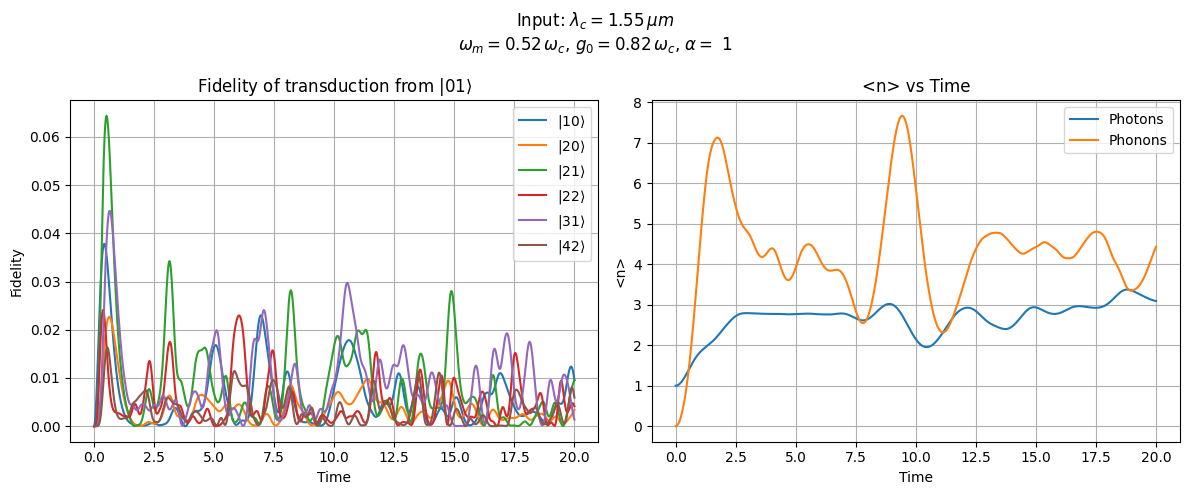

In [55]:
c = 3*10**8
h = 6.626*10**-34
hbar = h/(2*np.pi)

omega_photon = 2*np.pi*c/(1.55*10**-6)
omega_phonon = 2*np.pi*10**14 # f=100 THz
g_0 = 10**15
alpha = 1

truncation_photon_space = 10
truncation_phonon_space = 20
omega_photon_copy = omega_photon
omega_phonon /= omega_photon
g_0 /= omega_photon
omega_photon = 1

tmax = 20
tlist = np.linspace(0, tmax, 1000)

phonon_term = omega_phonon * tensor(num(truncation_phonon_space), qeye(truncation_photon_space))
cdagger_c_product = (alpha*qeye(truncation_photon_space)+create(truncation_photon_space)) @ (alpha*qeye(truncation_photon_space)+destroy(truncation_photon_space))
photon_term = omega_photon * tensor(qeye(truncation_phonon_space), cdagger_c_product)

coupling_term = g_0 * tensor(create(truncation_phonon_space) + destroy(truncation_phonon_space), cdagger_c_product)

H = phonon_term + photon_term + coupling_term

initial_state = tensor(basis(truncation_phonon_space, 0), basis(truncation_photon_space, 1))
evolved_states = sesolve(H, initial_state, tlist)

# Target states
target_state10 = tensor(basis(truncation_phonon_space, 1), basis(truncation_photon_space, 0))
target_state20 = tensor(basis(truncation_phonon_space, 2), basis(truncation_photon_space, 0))
target_state21 = tensor(basis(truncation_phonon_space, 2), basis(truncation_photon_space, 1))
target_state22 = tensor(basis(truncation_phonon_space, 2), basis(truncation_photon_space, 2))
target_state31 = tensor(basis(truncation_phonon_space, 3), basis(truncation_photon_space, 1))
target_state42 = tensor(basis(truncation_phonon_space, 4), basis(truncation_photon_space, 2))

fidelity_array_10 = [np.abs(target_state10.overlap(state))**2 for state in evolved_states.states]
fidelity_array_20 = [np.abs(target_state20.overlap(state))**2 for state in evolved_states.states]
fidelity_array_21 = [np.abs(target_state21.overlap(state))**2 for state in evolved_states.states]
fidelity_array_31 = [np.abs(target_state31.overlap(state))**2 for state in evolved_states.states]
fidelity_array_22 = [np.abs(target_state22.overlap(state))**2 for state in evolved_states.states]
fidelity_array_42 = [np.abs(target_state42.overlap(state))**2 for state in evolved_states.states]

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Fidelity vs Time in the first subplot
axes[0].plot(tlist, fidelity_array_10, label=r'$\vert 10 \rangle$')
axes[0].plot(tlist, fidelity_array_20, label=r'$\vert 20 \rangle$')
axes[0].plot(tlist, fidelity_array_21, label=r'$\vert 21 \rangle$')
axes[0].plot(tlist, fidelity_array_22, label=r'$\vert 22 \rangle$')
axes[0].plot(tlist, fidelity_array_31, label=r'$\vert 31 \rangle$')
axes[0].plot(tlist, fidelity_array_42, label=r'$\vert 42 \rangle$')
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Fidelity")
axes[0].set_title(r"Fidelity of transduction from $\vert 01 \rangle$")
axes[0].legend()
axes[0].grid(True)

# Photon and Phonon Expectation vs Time in the second subplot
photon_number_operator = tensor(qeye(truncation_phonon_space), num(truncation_photon_space))
phonon_number_operator = tensor(num(truncation_phonon_space), qeye(truncation_photon_space))

photon_expectation = expect(photon_number_operator, evolved_states.states)
phonon_expectation = expect(phonon_number_operator, evolved_states.states)

axes[1].plot(tlist, photon_expectation, label="Photons")
axes[1].plot(tlist, phonon_expectation, label="Phonons")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("<n>")
axes[1].legend()
axes[1].set_title("<n> vs Time")
axes[1].grid(True)

# Show the plots
fig.suptitle(rf'Input: $\lambda_c = {(2*np.pi*c/omega_photon_copy*10**6):.2f} \, \mu m$' 
             '\n'  # Correct way to break the line
             rf'$\omega_m = {omega_phonon:.2f} \, \omega_c$, $g_0 = {g_0:.2f} \, \omega_c$, $\alpha =$ {alpha}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Functions to retrieve fidelities from outcar file 
(extracts external pressure and Volume of the unit cell, valid only for GaAs)

In [72]:
def compute_refractive_index(outcar_name, plot_min_wavelength, plot_max_wavelength, cavity_length, semiconductor_length):
    assert plot_max_wavelength > plot_min_wavelength, "Invalid wavelength range for plotting"
    assert cavity_length > semiconductor_length, "Semiconductor must fit inside cavity"

    # Read OUTCAR once
    with open(outcar_name, "r") as OUTCAR:
        lines = OUTCAR.readlines()
    
    # Extract imaginary and real dielectric functions
    def extract_dielectric_function(lines, key):
        data = []
        found = False
        for line in lines:
            if key in line:
                found = True
                continue
            if found:
                line = line.strip()
                if not line:
                    break
                # Try to extract values as floats, skip lines that don't work
                try:
                    values = list(map(float, line.split()))
                    data.append(values)
                except ValueError:
                    continue  # Skip lines that can't be converted to floats
        return np.array(data) if data else None

    dataim = extract_dielectric_function(
        lines, "frequency dependent IMAGINARY DIELECTRIC FUNCTION"
    )
    datareal = extract_dielectric_function(
        lines, "frequency dependent      REAL DIELECTRIC FUNCTION"
    )

    if dataim is None or datareal is None:
        raise ValueError("Dielectric function data not found in OUTCAR.")

    # Extract volume and pressure
    volumes = []
    pressures = []
    
    for line in lines:
        if "volume of cell" in line:
            try:
                volumes.append(float(line.split()[4]))
            except ValueError:
                continue  
        if "external pressure" in line:
            try:
                pressures.append(float(line.split()[3]))
            except ValueError:
                continue  

    if volumes:
        most_frequent_volume = Counter(volumes).most_common(1)[0][0]
        cell_volume = most_frequent_volume * 1e-30  # Convert to cubic meters
        print(f'volume of cell: {cell_volume}')
    else:
        raise ValueError("No valid volume found in OUTCAR.")

    if len(set(pressures)) != 1:
        raise ValueError(f"Unexpected number of unique external pressures found: {set(pressures)}")
    
    pressure = pressures[0]

    # Process extracted data
    energy_array_eV = dataim[:, 0]
    img = dataim[:, 1]
    real = datareal[:, 1]

    h = 6.62607015e-34
    c = 299792458
    hbar = h / (2 * np.pi)

    refractive_index_array = np.sqrt((np.sqrt(real**2 + img**2) + real) / 2)

    np.seterr(divide='ignore')

    energy_array_J = energy_array_eV * 1.6e-19  # Convert eV to Joules
    omega_array = energy_array_J / hbar # rad per s
    wavelength_array = (h * c) / energy_array_J # m

    # Filtering range (assuming input min/max wavelengths are in µm, and we convert them to nm for comparison)
    plot_wavelength_mask = (plot_min_wavelength * 1e-6 < wavelength_array) & (wavelength_array < plot_max_wavelength * 1e-6)
    plot_omega_mask = (2*np.pi*c/(plot_min_wavelength*1e-6) > omega_array) & (omega_array > 2*np.pi*c/(plot_max_wavelength*1e-6))
    filtered_wavelength = wavelength_array[plot_wavelength_mask]
    filtered_omega = omega_array[plot_omega_mask]
    filtered_refractive_index = refractive_index_array[plot_wavelength_mask]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize to your preference

    # Plot refractive index vs. wavelength in the first subplot
    axes[0].plot(filtered_wavelength * 1e9, filtered_refractive_index, linestyle='-')
    axes[0].set_xlabel("Wavelength (nm)")
    axes[0].set_ylabel("Refractive index [-]")
    axes[0].grid(True)

        # Compute g_0
    N = semiconductor_length / cell_volume**(1/3)  
    m_Ga, m_As = 69.723, 74.921  # Atomic masses of Ga and As in amu
    N_Ga, N_As = 4, 4  # Number of Ga and As atoms in a unit cell
    m = (N_Ga * m_Ga + N_As * m_As) * 1.66e-27  # Atomic mass in kg

    prefactor = np.sqrt(hbar * semiconductor_length / (2 * np.pi * N * m * c))

    denominator = cavity_length + semiconductor_length * (filtered_refractive_index - 1)

    g_0_array = filtered_omega * (1 - filtered_refractive_index) / denominator * prefactor
    
    # Plot g_0 vs. wavelength in the first subplot
    axes[1].plot(filtered_wavelength*1e9, g_0_array)
    axes[1].set_xlabel("Wavelength (nm)")
    axes[1].set_ylabel("g_0 coupling [-]")
    axes[1].grid(True)

    # Show the plots
    plt.suptitle(f"GaAs under hydrostatic {pressure} kB pressure")
    plt.tight_layout()
    plt.show()


    return filtered_omega, g_0_array, pressure


In [73]:
def compute_fidelity(omega_array, g_0_array, alpha,
                     omega_photon, omega_phonon,
                     truncation_photon_space, truncation_phonon_space, pressure, set_g_0= None):
    
    index_photon_omega = np.abs(omega_array - omega_photon).argmin()

    # Extract the corresponding g_0 value from g_0_array
    g_0_at_photon_omega = g_0_array[index_photon_omega]

    print(f"g_0 value at photon transduction omega ({omega_photon:.3e} rad per s): {g_0_at_photon_omega}")
    if set_g_0 is not None:
        print(f'g_0 is set manually to: {set_g_0}')
        g_0_at_photon_omega = set_g_0

    c = 3*10**8

    truncation_photon_space = 10
    truncation_phonon_space = 20
    omega_photon_copy = omega_photon
    omega_phonon /= omega_photon
    g_0_at_photon_omega /= omega_photon
    omega_photon = 1

    tmax = 20
    tlist = np.linspace(0, tmax, 1000)

    phonon_term = omega_phonon * tensor(num(truncation_phonon_space), qeye(truncation_photon_space))
    cdagger_c_product = (alpha*qeye(truncation_photon_space)+create(truncation_photon_space)) @ (alpha*qeye(truncation_photon_space)+destroy(truncation_photon_space))
    photon_term = omega_photon * tensor(qeye(truncation_phonon_space), cdagger_c_product)

    coupling_term = g_0_at_photon_omega * tensor(create(truncation_phonon_space) + destroy(truncation_phonon_space), cdagger_c_product)

    H = phonon_term + photon_term + coupling_term

    initial_state = tensor(basis(truncation_phonon_space, 0), basis(truncation_photon_space, 1))
    evolved_states = sesolve(H, initial_state, tlist)

    # Target states
    target_state10 = tensor(basis(truncation_phonon_space, 1), basis(truncation_photon_space, 0))
    target_state20 = tensor(basis(truncation_phonon_space, 2), basis(truncation_photon_space, 0))
    target_state21 = tensor(basis(truncation_phonon_space, 2), basis(truncation_photon_space, 1))
    target_state22 = tensor(basis(truncation_phonon_space, 2), basis(truncation_photon_space, 2))
    target_state31 = tensor(basis(truncation_phonon_space, 3), basis(truncation_photon_space, 1))
    target_state42 = tensor(basis(truncation_phonon_space, 4), basis(truncation_photon_space, 2))

    fidelity_array_10 = [np.abs(target_state10.overlap(state))**2 for state in evolved_states.states]
    fidelity_array_20 = [np.abs(target_state20.overlap(state))**2 for state in evolved_states.states]
    fidelity_array_21 = [np.abs(target_state21.overlap(state))**2 for state in evolved_states.states]
    fidelity_array_31 = [np.abs(target_state31.overlap(state))**2 for state in evolved_states.states]
    fidelity_array_22 = [np.abs(target_state22.overlap(state))**2 for state in evolved_states.states]
    fidelity_array_42 = [np.abs(target_state42.overlap(state))**2 for state in evolved_states.states]

    # Create a figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Fidelity vs Time in the first subplot
    axes[0].plot(tlist, fidelity_array_10, label=r'$\vert 10 \rangle$')
    axes[0].plot(tlist, fidelity_array_20, label=r'$\vert 20 \rangle$')
    axes[0].plot(tlist, fidelity_array_21, label=r'$\vert 21 \rangle$')
    axes[0].plot(tlist, fidelity_array_22, label=r'$\vert 22 \rangle$')
    axes[0].plot(tlist, fidelity_array_31, label=r'$\vert 31 \rangle$')
    axes[0].plot(tlist, fidelity_array_42, label=r'$\vert 42 \rangle$')
    axes[0].set_xlabel("Time")
    axes[0].set_ylabel("Fidelity")
    axes[0].set_title(r"Fidelity of transduction from $\vert 01 \rangle$")
    axes[0].legend()
    axes[0].grid(True)

    # Photon and Phonon Expectation vs Time in the second subplot
    photon_number_operator = tensor(qeye(truncation_phonon_space), num(truncation_photon_space))
    phonon_number_operator = tensor(num(truncation_phonon_space), qeye(truncation_photon_space))

    photon_expectation = expect(photon_number_operator, evolved_states.states)
    phonon_expectation = expect(phonon_number_operator, evolved_states.states)

    axes[1].plot(tlist, photon_expectation, label="Photons")
    axes[1].plot(tlist, phonon_expectation, label="Phonons")
    axes[1].set_xlabel("Time")
    axes[1].set_ylabel("<n>")
    axes[1].legend()
    axes[1].set_title("<n> vs Time")
    axes[1].grid(True)

    # Show the plots
    fig.suptitle(rf'Input: $\lambda_c = {(2*np.pi*c/omega_photon_copy*10**6):.2f} \, \mu m$' 
                '\n'  # Correct way to break the line
                rf'$\omega_m = {omega_phonon:.2f} \, \omega_c$, $g_0 = {g_0_at_photon_omega:.2e} \, \omega_c$, $\alpha =$ {alpha}')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

volume of cell: 1.6952000000000003e-28


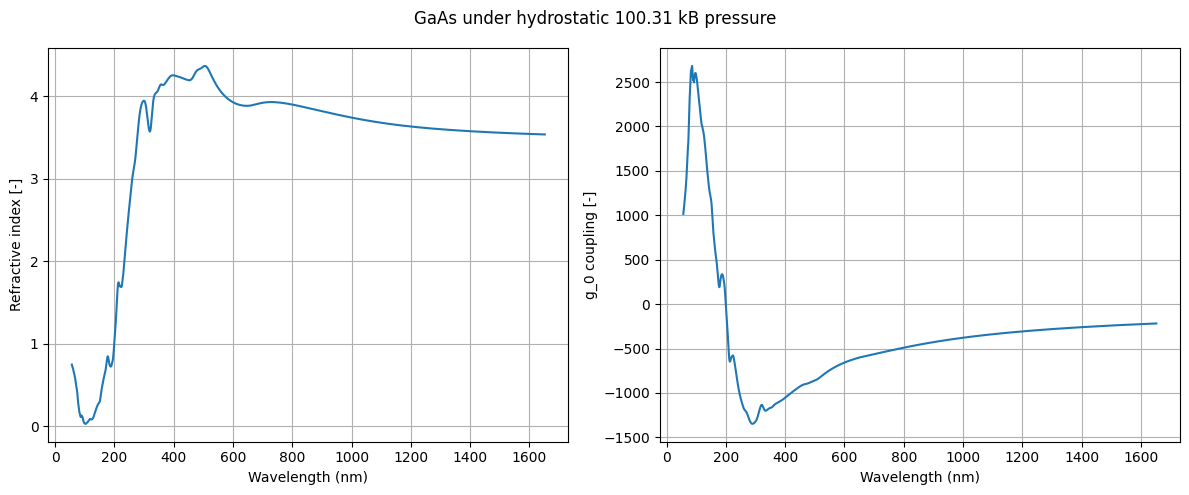

g_0 value at photon transduction omega (1.216e+15 rad per s): -231.32321642560683


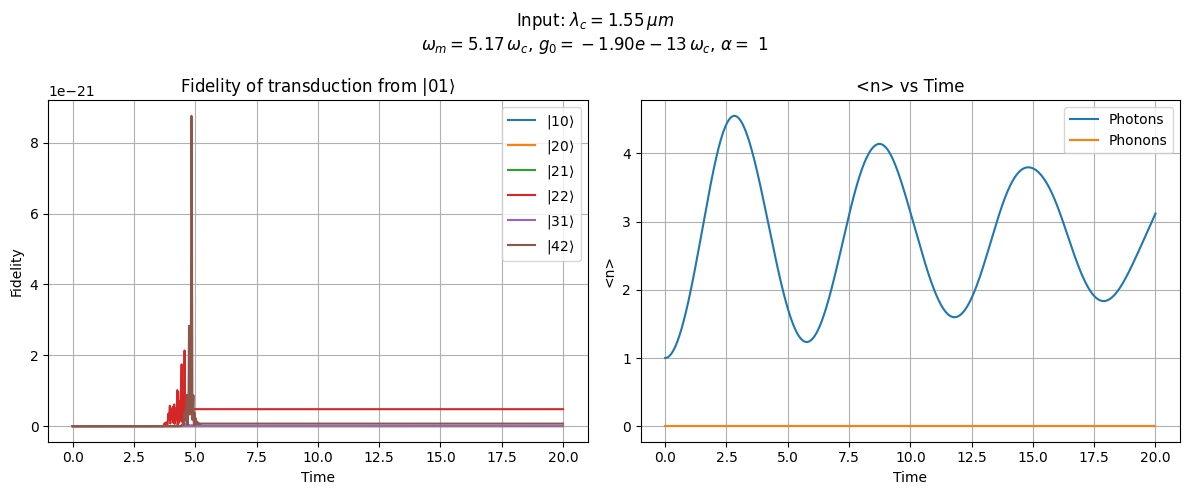

In [74]:
# specify all wavelengths in micrometers
omega_array, g_0_array, external_pressure = compute_refractive_index(outcar_name='OUTCAR_hydrostatic_100kB', 
        plot_min_wavelength=0.001, plot_max_wavelength= 1.7,
        cavity_length= 0.05, semiconductor_length= 0.01)

compute_fidelity(omega_array, g_0_array, alpha=1, omega_photon = 2*np.pi*3*10**8/(1.55*10**-6), omega_phonon = 2*np.pi*10**15,
                 truncation_photon_space = 2, truncation_phonon_space = 5, pressure=external_pressure,
                 set_g_0 = None)
